***Improvements:*** 


1.   Add in Class weights to handle Imbalance 
2.   Increase Units in Dense layers and Also Increase Number of Layers 
3.   Add BatchNormalization to Layers 
4.   Add Dropout after Layers 



In [4]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

# Setting the theme and fontsize of figures
sns.set_theme(style = 'darkgrid', font_scale = 1.13)
# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns in a dataframe
pd.set_option("display.max_columns", None)

In [5]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')
# Reading the data
df = pd.read_csv("/content/drive/MyDrive/Python_files/Churn_Modelling.csv")
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
# Dropping unnecessary columns
df.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [7]:
# Check if Data has any null values 
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Check for Object datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
# Ensuring the original dataset remains unchanged
data = df.copy()
# List of all categorical variables
cat_cols = data.select_dtypes(include = ['object', 'category']).columns.tolist()
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col in cat_cols:
    Le = LabelEncoder()
    data[col] = Le.fit_transform(data[col])
    Label_encoder_collection[col] = Le 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [10]:
# Transformed categorical columns
Label_encoder_collection

{'Geography': LabelEncoder(), 'Gender': LabelEncoder()}

In [13]:
# Splitting the dataset into training and test sets
X = data.drop(columns = ['Exited'], axis = 1)
Y = data['Exited']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 1, stratify = Y)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size = 0.5, random_state = 1, stratify = Y_valid)

In [14]:
# Fraction of output classes in training, validation and test sets
print('Fraction of classes in the original set:\n', Y.value_counts(1), sep = '', end = '\n'+'**'*25+'\n')
print('Fraction of classes in the train set:\n', Y_train.value_counts(1), sep = '', end = '\n'+'**'*25+'\n')
print('Fraction of classes in the validation set:\n', Y_valid.value_counts(1), sep = '', end = '\n'+'**'*25+'\n')
print('Fraction of classes in the test set:\n', Y_test.value_counts(1), sep = '')

Fraction of classes in the original set:
0   0.796
1   0.204
Name: Exited, dtype: float64
**************************************************
Fraction of classes in the train set:
0   0.796
1   0.204
Name: Exited, dtype: float64
**************************************************
Fraction of classes in the validation set:
0   0.797
1   0.203
Name: Exited, dtype: float64
**************************************************
Fraction of classes in the test set:
0   0.796
1   0.204
Name: Exited, dtype: float64


In [15]:
# Calculating the weight that needs to be multiplied by each class to remove the data imbalance
class_weights = {}
for c in np.sort(Y.unique()):
    class_weights[c] = 1/Y.value_counts(1)[c]
class_weights

{0: 1.2558081125204068, 1: 4.909180166912126}

In [69]:
# Add in Class weights to handle Imbalance 
# Increase Units in Dense layers and Also Increase Number of Layers 
# Add BatchNormalization to Layers 
# Add Dropout after Layers 
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape = (X.shape[1], )))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 , activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

# print summary to undertstand your neural network flow
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_11 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 128)               1408      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)               

In [70]:
# Create your optimizer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(Optimizer, loss = 'binary_crossentropy', metrics = ["accuracy", tf.keras.metrics.Recall(name = 'recall')])

In [71]:
# Ensuring the best-performing model on the validation data is picked
best_model_selection = tf.keras.callbacks.ModelCheckpoint('best_model.tf', monitor = 'val_recall', mode = 'max',
                                                          save_best_only = True, save_weights_only = True, verbose = 1)
# Terminating the model fitting if the performance on validation set didn't improve for several epochs
early_termination = tf.keras.callbacks.EarlyStopping(patience = 5, verbose = 1)

In [72]:
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 25,
                    callbacks = [best_model_selection, early_termination], class_weight = class_weights)

Epoch 1/25
220/235 [===========================>..] - ETA: 0s - loss: 1.2913 - accuracy: 0.6489 - recall: 0.6434
Epoch 1: val_recall improved from -inf to 0.77165, saving model to best_model.tf
235/235 [==============================] - 2s 5ms/step - loss: 1.2830 - accuracy: 0.6521 - recall: 0.6459 - val_loss: 0.5926 - val_accuracy: 0.6768 - val_recall: 0.7717
Epoch 2/25
232/235 [============================>.] - ETA: 0s - loss: 1.1031 - accuracy: 0.7100 - recall: 0.7452
Epoch 2: val_recall did not improve from 0.77165
235/235 [==============================] - 1s 4ms/step - loss: 1.1074 - accuracy: 0.7087 - recall: 0.7435 - val_loss: 0.5367 - val_accuracy: 0.7064 - val_recall: 0.7677
Epoch 3/25
231/235 [============================>.] - ETA: 0s - loss: 1.0653 - accuracy: 0.7144 - recall: 0.7387
Epoch 3: val_recall did not improve from 0.77165
235/235 [==============================] - 1s 4ms/step - loss: 1.0667 - accuracy: 0.7139 - recall: 0.7382 - val_loss: 0.5081 - val_accuracy: 0.7

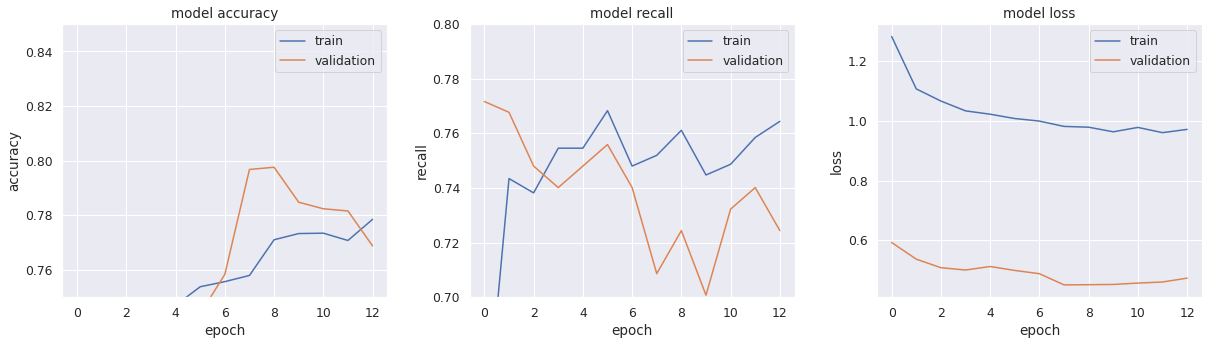

In [73]:
plt.figure(figsize = (17, 5));
#  "Accuracy Plot"
plt.subplot(131);
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.title('model accuracy');
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.ylim(0.75, 0.85);
plt.legend(['train', 'validation'], loc = 'best');

#  "Recall Plot"
plt.subplot(132);
plt.plot(history.history['recall']);
plt.plot(history.history['val_recall']);
plt.title('model recall');
plt.ylabel('recall');
plt.xlabel('epoch');
plt.ylim(0.7, 0.8);
plt.legend(['train', 'validation'], loc = 'best');

# "Loss Plot"
plt.subplot(133);
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'validation'], loc = 'best');
plt.tight_layout(w_pad = 2);
plt.show();

# In comparison with the plain NN, fluctuations, especially in loss, have been substantially suppressed.

In [74]:
# Loading the weights of the best-performing iteration into the model
model.load_weights('best_model.tf')
# collect predictions 
predictions = np.round(model.predict(X_test))

40/40 [==============================] - 0s 2ms/step


In [75]:
# Check Accuracy
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
print('Accuracy score =', round(accuracy_score(Y_test , predictions), 3)) 
print('Recall score =', round(recall_score(Y_test , predictions), 3)) 
print('Precision score =', round(precision_score(Y_test , predictions), 3)) 
print('F1 score =', round(f1_score(Y_test , predictions), 3)) 

Accuracy score = 0.695
Recall score = 0.765
Precision score = 0.378
F1 score = 0.506


In [76]:
# Defining a function that would plot the confusion matrix in the form of a heatmap
def confusion_matrix_plot(y_truth, y_pred):
    '''This function generates a 2*2 heatmap representing the confusion matrix of
    actual data and predictions.'''

    # Calculating the confusion matrix
    cm = confusion_matrix(y_truth, y_pred)
    # Converting the confusion matrix into a dataframe
    cm_df = pd.DataFrame(cm, index = ['Truth - Stayed', 'Truth - Exited'],
                         columns = ['Prediction - Stayed', 'Prediction - Exited'])
    
    # Generating labels for the confusion matrix heatmap
    labels = []
    for i in range(len(cm.flatten())):
        labels.append(str(cm.flatten()[i]) + '\n(' + 
                      str(np.round(cm.flatten()[i]/cm.flatten().sum()*100, 2)) + '%)')
    labels = np.asarray(labels).reshape(2, 2)
    
    # Plotting the heatmap     
    sns.heatmap(data = cm_df, annot = labels, fmt = '', cmap = 'seismic', cbar = False,
                vmin = -len(y_truth), vmax = len(y_truth))
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

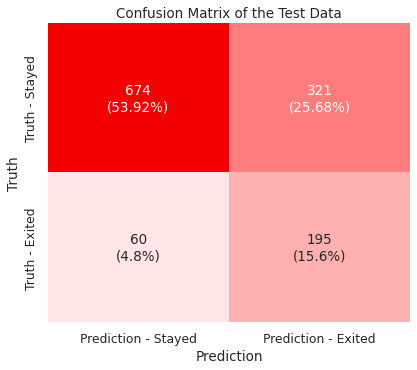

In [77]:
# Generating the confusion matrix for predictions on the test data
plt.figure(figsize = (6.5, 5.5));
confusion_matrix_plot(Y_test, predictions);
plt.title('Confusion Matrix of the Test Data');